# **Poland Used car Price Prediction**

This dataset scraped from largest Polish used and new cars offers website otomoto.pl

The notebook focus on using different methods to build price predicion models for used cars in Poland Market.

If you find this notebook helpful, please **upvote!!!!!**

The variables within the dataset are as follow: 

* brand: The brand or manufacturer of the car, e.g., Volkswagen, Toyota, BMW, Ford, etc.
* model: The model of the car
* price_in_pln: The listed price of the car in Polish Zloty (PLN), providing insights into the pricing trends of used cars in Poland
* mileage: The recorded mileage of the car, representing the total distance the vehicle has traveled in kilometers (km).
* gearbox: The type of gearbox used in the car, denoted as either manual or automatic.
* engine_capacity: The engine capacity or displacement of the car, measured in cubic centimeters (cc), indicating the size of the engine.
* fuel_type: The type of fuel used by the car, including options such as petrol, diesel, hybrid, electric, etc.
* city: The city where the car is located or advertised for sale, offering insights into regional variations in used car availability.
* voivodeship: The administrative region or voivodeship where the city is situated, providing a more granular location reference.
* year: The year of manufacture of the car, representing its age and allowing for temporal analysis of the used car market.

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# 1. Data Cleaning

In [297]:
data = pd.read_csv('/kaggle/input/poland-used-cars-offers/data.csv')

In [298]:
data.shape

(91523, 10)

In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91523 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            91523 non-null  object 
 1   model            91523 non-null  object 
 2   price_in_pln     91523 non-null  float64
 3   mileage          91523 non-null  object 
 4   gearbox          91523 non-null  object 
 5   engine_capacity  91523 non-null  object 
 6   fuel_type        91523 non-null  object 
 7   city             91523 non-null  object 
 8   voivodeship      91523 non-null  object 
 9   year             91523 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.0+ MB


In [300]:
data.head()

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995


In [301]:
#Check for duplicates
data[data.duplicated()]

,brand,model,price_in_pln,mileage,gearbox,engine_capacity,fuel_type,city,voivodeship,year
14,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,133 760 km,manual,1 970 cm3,Benzyna,Łask,Łódzkie,1998
15,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,133 760 km,manual,1 970 cm3,Benzyna,Mława,Mazowieckie,1998
16,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,227 000 km,manual,1 970 cm3,Benzyna,Chełmża,Kujawsko-pomorskie,1996
17,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,227 000 km,manual,1 970 cm3,Benzyna,Jasło,Podkarpackie,1996
18,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,239 000 km,manual,1 995 cm3,Benzyna+LPG,Pabianice,Łódzkie,1995
...,...,...,...,...,...,...,...,...,...,...
89199,volvo,Volvo S80 3.2 Summum,24900.0,442 000 km,automatic,2 400 cm3,Diesel,Siedlce,Mazowieckie,2008
89200,volvo,Volvo V50,11070.0,360 000 km,automatic,2 401 cm3,Diesel,Środa Śląska,Dolnośląskie,2005
89958,volvo,Volvo V90,159900.0,204 000 km,automatic,1 969 cm3,Diesel,Warszawa,Mazowieckie,2016
91016,volvo,Volvo XC 40,154900.0,88 000 km,automatic,1 969 cm3,Diesel,Warszawa,Mazowieckie,2020


In [302]:
#Delete duplicate rows
data.drop_duplicates(inplace=True)

In [303]:
data.shape

(83427, 10)

In [304]:
data['engine_capacity'].value_counts()

1 598 cm3    6598
1 968 cm3    3895
1 995 cm3    3544
1 997 cm3    3415
1 998 cm3    2689
             ... 
4 800 km        1
4 900 km        1
26 000 km       1
929 km          1
10 300 km       1
Name: engine_capacity, Length: 640, dtype: int64

In [305]:
data['mileage'].value_counts()

Benzyna       2497
5 km          1844
1 km          1632
Diesel        1593
10 km          845
              ... 
202 021 km       1
64 895 km        1
5 363 km         1
16 180 km        1
94 887 km        1
Name: mileage, Length: 14154, dtype: int64

In [306]:
data['year'].value_counts()

2018         6083
2017         5787
2019         5718
2016         4864
2023         4691
             ... 
250 km          1
300 km          1
16 361 km       1
13 250 km       1
12 830 km       1
Name: year, Length: 349, dtype: int64

# 2. Feauture Engineering

**1.Numerical Data**

There is no null value within the dataset. 

However, the mileage, engine_capacity and year should be numerical variables, so we need to transfrom their formats

Additionaly, it is obvisouly that there are some errors with these variables, therefore, we also need to drop these errors.

In [307]:
#Select the data withou input errors
condition1 = data['engine_capacity'].str.contains('cm3')
condition2 = data['mileage'].str.contains('km')
condition3 = -data['year'].str.contains('km')

In [308]:
df = data[condition1 & condition2 & condition3]

In [309]:
df.shape

(77688, 10)

In [310]:
df['engine_capacity'].value_counts()

1 598 cm3    6597
1 968 cm3    3885
1 995 cm3    3544
1 997 cm3    3414
1 998 cm3    2687
             ... 
2 196 cm3       1
3 900 cm3       1
5 733 cm3       1
1 581 cm3       1
2 476 cm3       1
Name: engine_capacity, Length: 519, dtype: int64

In [311]:
df['mileage'].value_counts()

5 km          1776
1 km          1575
10 km          808
190 000 km     460
180 000 km     459
              ... 
229 394 km       1
126 930 km       1
117 313 km       1
35 880 km        1
160 795 km       1
Name: mileage, Length: 14035, dtype: int64

In [312]:
df['year'].value_counts()

2018    6066
2017    5773
2019    5702
2016    4856
2011    4514
2015    4463
2023    4400
2014    4379
2012    4215
2010    4066
2013    3982
2022    3813
2020    2927
2021    2794
2009    2614
2008    2511
2007    2392
2006    1942
2005    1476
2004    1330
2003     809
2002     583
1999     513
2001     406
1998     383
2000     302
1997     183
1995     158
1996     136
Name: year, dtype: int64

In [313]:
#Now it seems that the input errors have been addressed, next let's transform these data into the right format
new_df = df.copy()
# Remove "cm3" from the engine_capacity column
new_df.loc[:, 'engine_capacity(cm3)'] = new_df['engine_capacity'].str.replace('cm3', '')
new_df.loc[:, 'engine_capacity(cm3)'] = new_df['engine_capacity(cm3)'].str.replace(' ', '')
# Remove "km" from the mileage column
new_df.loc[:, 'mileage(km)'] = new_df['mileage'].str.replace('km', '')
new_df.loc[:, 'mileage(km)'] = new_df['mileage(km)'].str.replace(' ', '')

new_df['engine_capacity(cm3)'] = new_df['engine_capacity(cm3)'].astype(int)
new_df['mileage(km)'] = new_df['mileage(km)'].astype(int)


new_df['engine_capacity(cm3)'] = new_df['engine_capacity(cm3)'].astype(float)
new_df['mileage(km)'] = new_df['mileage(km)'].astype(float)
new_df['year'] = new_df['year'].astype(int)

In [314]:
#Delete the original conlumn
new_df.drop(['mileage', 'engine_capacity'], axis=1, inplace=True)

In [315]:
new_df.head()

,brand,model,price_in_pln,gearbox,fuel_type,city,voivodeship,year,engine_capacity(cm3),mileage(km)
0,alfa-romeo,Alfa Romeo Spider 2.0-16 TSpark,14700.0,manual,Benzyna,Łask,Łódzkie,1998,1970.0,133760.0
1,alfa-romeo,Alfa Romeo GTV 2.0 16v TSpark,14000.0,manual,Benzyna,Mława,Mazowieckie,1998,1970.0,133760.0
2,alfa-romeo,Alfa Romeo 164 2.0 TSpark Super,4500.0,manual,Benzyna,Chełmża,Kujawsko-pomorskie,1996,1970.0,227000.0
3,alfa-romeo,Alfa Romeo Spider 2.0 TSpark,17100.0,manual,Benzyna,Jasło,Podkarpackie,1996,1970.0,227000.0
4,alfa-romeo,Alfa Romeo 156 1.6 TSpark 16v,3900.0,manual,Benzyna+LPG,Pabianice,Łódzkie,1995,1995.0,239000.0


In [316]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77688 entries, 0 to 91522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 77688 non-null  object 
 1   model                 77688 non-null  object 
 2   price_in_pln          77688 non-null  float64
 3   gearbox               77688 non-null  object 
 4   fuel_type             77688 non-null  object 
 5   city                  77688 non-null  object 
 6   voivodeship           77688 non-null  object 
 7   year                  77688 non-null  int64  
 8   engine_capacity(cm3)  77688 non-null  float64
 9   mileage(km)           77688 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 6.5+ MB


**2. Categorical Data**

There are 6 categorical features:
* brand: The brand or manufacturer of the car, e.g., Volkswagen, Toyota, BMW, Ford, etc.
* model: The model of the car
* gearbox: The type of gearbox used in the car, denoted as either manual or automatic.
* fuel_type: The type of fuel used by the car, including options such as petrol, diesel, hybrid, electric, etc.
* city: The city where the car is located or advertised for sale, offering insights into regional variations in used car availability.
* voivodeship: The administrative region or voivodeship where the city is situated, providing a more granular location reference.

In [317]:
var = 'brand'
new_df[var].value_counts()

volkswagen       10101
opel              9651
bmw               6575
mercedes-benz     6282
ford              5768
peugeot           5457
toyota            5309
renault           4481
volvo             4027
hyundai           3405
nissan            2436
kia               2270
seat              1862
honda             1414
land-rover         889
citroen            869
skoda              725
jeep               722
mitsubishi         712
mazda              487
audi               481
mini               478
fiat               471
jaguar             374
dacia              332
alfa-romeo         303
porsche            295
chevrolet          274
dodge              238
smart              145
saab               126
maserati           119
infiniti           106
isuzu               93
daewoo              77
daihatsu            67
lancia              66
bentley             66
cadillac            54
ferrari             28
rover               24
aston-martin        19
lamborghini         10
Name: brand

In [318]:
var = 'model'
new_df[var].value_counts()

Opel Astra                                                  1007
Volkswagen Golf                                              672
Toyota Corolla                                               600
Ford Focus                                                   501
Volkswagen Passat                                            459
                                                            ... 
Opel Astra IV 1.6 EU6                                          1
Opel Adam 1.4 Black Jack Easytronic                            1
Opel Grandland X 1.5 CDTI Edition Business Pack S&S            1
Opel Astra 1.4 Turbo Start/Stop Sports Tourer Innovation       1
Volvo XC 40 T3 Inscription                                     1
Name: model, Length: 18021, dtype: int64

It seems that 'model' contains three important features about the car:

1.Brand

2.Model

3.Option

Generally, all of these features will influence the car price a lot. Here I will only focus on BMW

In [319]:
new_df.loc[new_df['brand'] == 'bmw', 'model'].value_counts()

BMW Seria 5                                       381
BMW Seria 3                                       343
BMW X3                                            167
BMW X5                                            117
BMW X1                                             83
                                                 ... 
BMW Seria 4 428i Coupe xDrive M Sport               1
BMW Seria 4 435d Gran Coupe xDrive Luxury Line      1
BMW Seria 5 520i Sport Line sport                   1
BMW Seria 4 430i Sport Line                         1
BMW Seria 3 318i Business Edition                   1
Name: model, Length: 1426, dtype: int64

In [320]:
bmw_df=new_df[new_df['brand'] == 'bmw']
split_info = bmw_df['model'].str.split(' ', n=3, expand=True)
seria_mask = split_info[1].str.lower() == 'seria'
bmw_df['Brand'] = split_info[0]
bmw_df['Model'] = split_info[1]
bmw_df.loc[seria_mask, 'Model'] = split_info[1] + ' ' + split_info[2]
bmw_df['Option'] = split_info[3]

bmw_df.drop(['brand', 'model'], axis=1, inplace=True)

In [321]:
bmw_df.head(5)

,price_in_pln,gearbox,fuel_type,city,voivodeship,year,engine_capacity(cm3),mileage(km),Brand,Model,Option
1300,18400.0,manual,Benzyna+LPG,Piła,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 5,528i
1301,34900.0,manual,Benzyna+LPG,Swarzędz,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 3,328Ci
1302,14350.0,manual,Benzyna,Brzesko,Małopolskie,1999,2793.0,289000.0,BMW,Seria 5,520i
1303,16800.0,manual,Benzyna,Ostrów Wielkopolski,Wielkopolskie,1999,2793.0,289000.0,BMW,Seria 3,316i
1304,107000.0,manual,Benzyna,Białystok,Podlaskie,1999,1991.0,252687.0,BMW,M3,None


In [322]:
bmw_df['Option'].value_counts()

xDrive                                   152
M Sport                                  145
xLine                                    129
mHEV sport                                87
mHEV                                      86
                                        ... 
428i Gran Coupe Sport-Aut Modern Line      1
530d Touring Sport Line                    1
420d Cabrio Luxury Line                    1
520i GPF                                   1
318i Business Edition                      1
Name: Option, Length: 984, dtype: int64

In [323]:
bmw_df['Model'].value_counts()

Seria 5    1353
Seria 3    1073
X5          672
X3          565
Seria 4     316
X1          312
Seria 7     309
Seria 1     286
Seria 2     254
X6          224
X4          202
X2          119
3GT         110
Seria 6      87
M3           85
i3           78
X7           67
Seria 8      61
M4           57
M5           54
5GT          38
M2           37
iX           36
X6M          24
i4           22
M8           22
6GT          22
i7           19
Z4           19
iX3          10
XM           10
i8            7
1M            7
M6            6
iX1           6
Z3            3
Name: Model, dtype: int64

In [324]:
bmw_df['Option'] = bmw_df['Option'].notnull().astype(int)

In [325]:
bmw_df.shape

(6575, 11)

In [326]:
bmw_df.head(10)

,price_in_pln,gearbox,fuel_type,city,voivodeship,year,engine_capacity(cm3),mileage(km),Brand,Model,Option
1300,18400.0,manual,Benzyna+LPG,Piła,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 5,1
1301,34900.0,manual,Benzyna+LPG,Swarzędz,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 3,1
1302,14350.0,manual,Benzyna,Brzesko,Małopolskie,1999,2793.0,289000.0,BMW,Seria 5,1
1303,16800.0,manual,Benzyna,Ostrów Wielkopolski,Wielkopolskie,1999,2793.0,289000.0,BMW,Seria 3,1
1304,107000.0,manual,Benzyna,Białystok,Podlaskie,1999,1991.0,252687.0,BMW,M3,0
1305,13500.0,manual,Benzyna,Grodzisk Mazowiecki,Mazowieckie,1999,1991.0,252687.0,BMW,Seria 5,1
1306,12900.0,manual,Benzyna,Słupca,Wielkopolskie,1999,1895.0,114492.0,BMW,Seria 3,1
1307,14900.0,manual,Benzyna,Zagórów,Wielkopolskie,1999,1895.0,114492.0,BMW,Seria 3,1
1308,17999.0,manual,Benzyna,Nasielsk,Mazowieckie,1995,2990.0,187600.0,BMW,Seria 3,1
1309,69000.0,manual,Benzyna,Białystok,Podlaskie,1995,2990.0,187600.0,BMW,Z3,0


# 3. Data Visualization

**Firstly, let's focus on the numerical features**

In [327]:
bmw_df.describe()

,price_in_pln,year,engine_capacity(cm3),mileage(km),Option
count,6.575000e+03,6575.000000,6575.000000,6575.000000,6575.000000
mean,1.659511e+05,2016.629962,2428.407148,119015.534297,0.640456
std,1.428447e+05,4.810853,714.528808,94911.586376,0.479903
min,3.700000e+03,1995.000000,647.000000,1.000000,0.000000
25%,6.999900e+04,2014.000000,1995.000000,39000.000000,0.000000
50%,1.230000e+05,2017.000000,1998.000000,102000.000000,1.000000
75%,2.088700e+05,2020.000000,2993.000000,186000.000000,1.000000
max,1.285000e+06,2023.000000,6600.000000,475000.000000,1.000000


<Axes: xlabel='price_in_pln', ylabel='Density'>

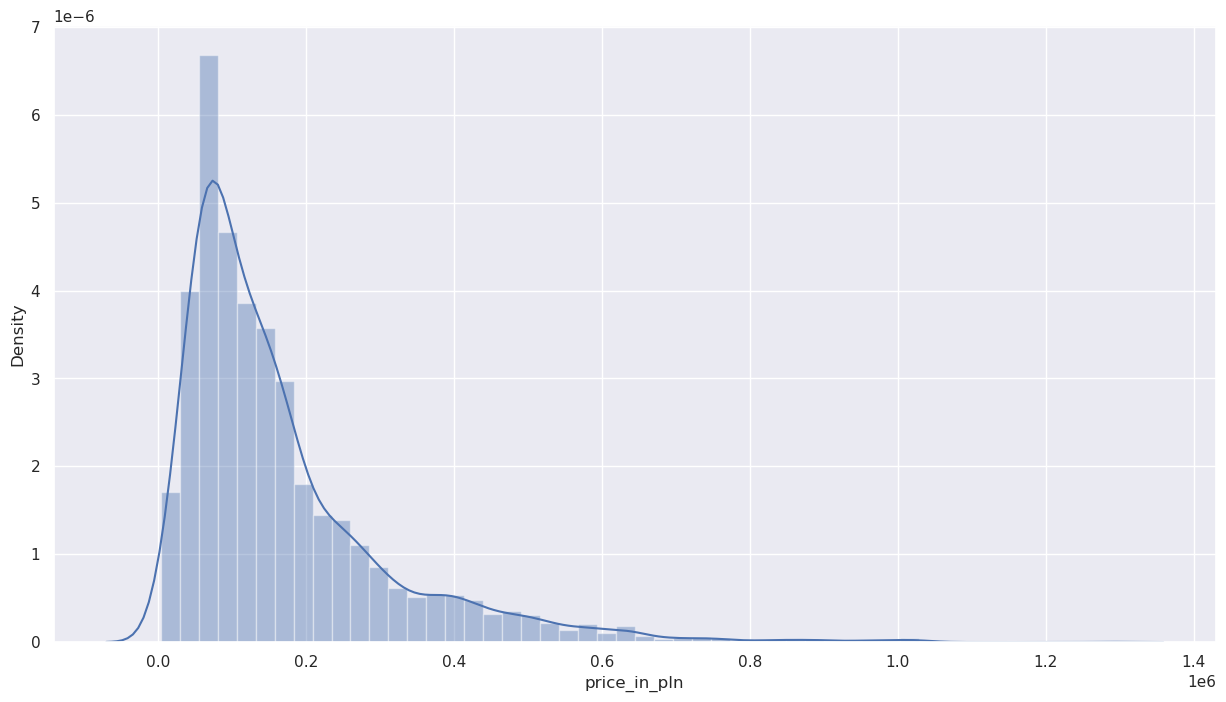

In [328]:
#Check the price distribuition
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(bmw_df['price_in_pln'])

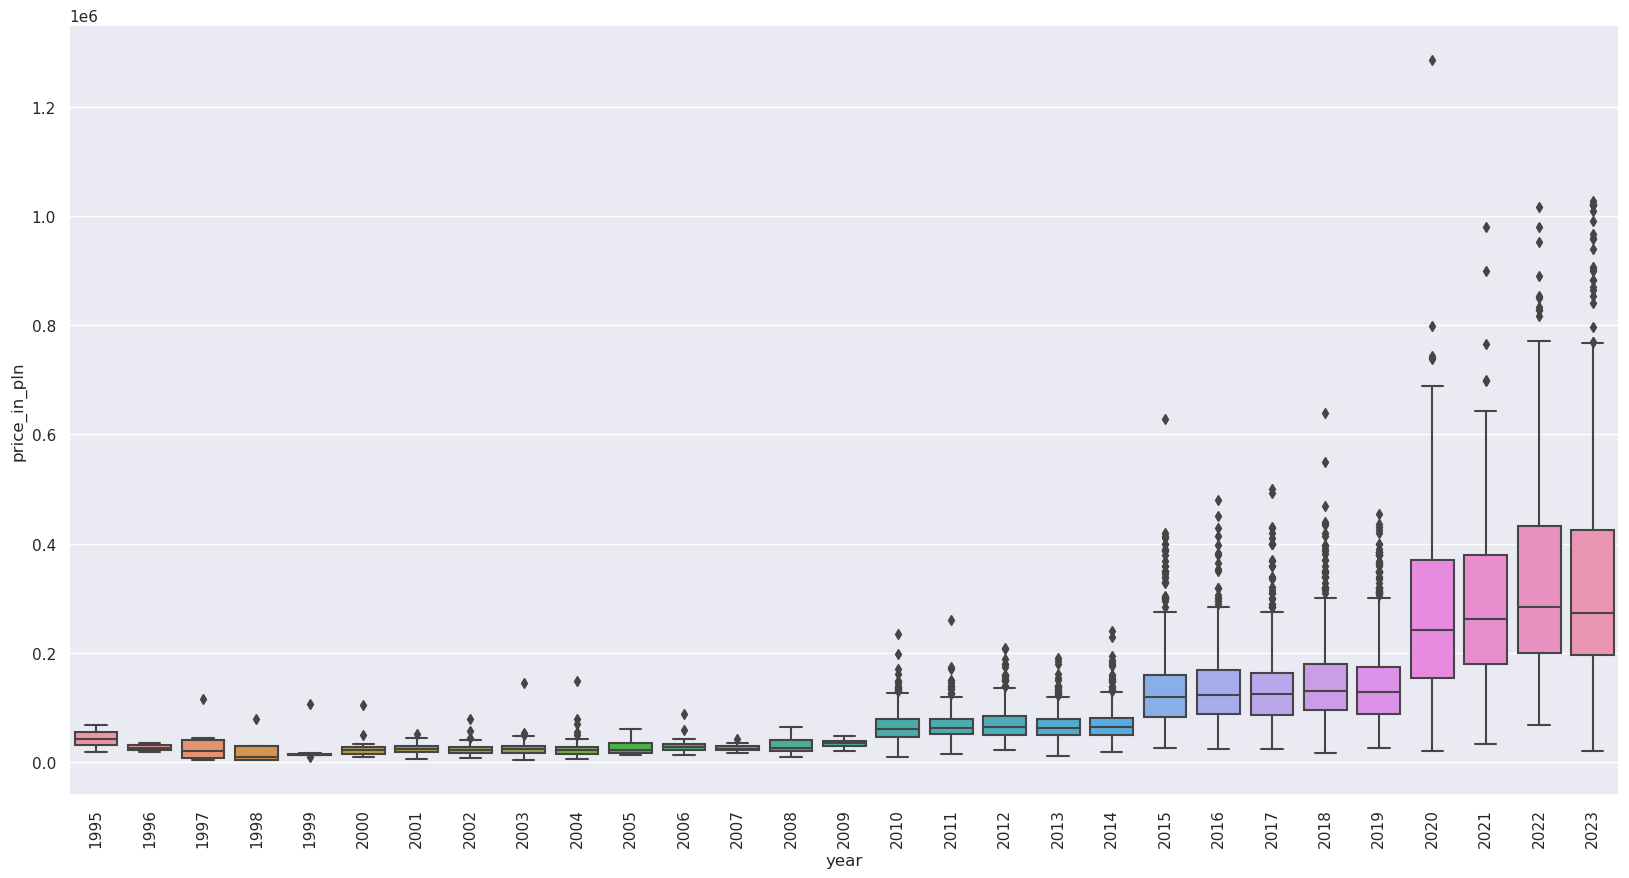

In [329]:
var = 'year'
data = pd.concat([bmw_df['price_in_pln'], bmw_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="price_in_pln", data=data)
plt.xticks(rotation=90);

The newer the car, the higher the price

In [330]:
#Next, let's check the fuel_type
bmw_df['fuel_type'].value_counts()

Diesel         3677
Benzyna        2699
Hybryda         149
Benzyna+LPG      50
Name: fuel_type, dtype: int64

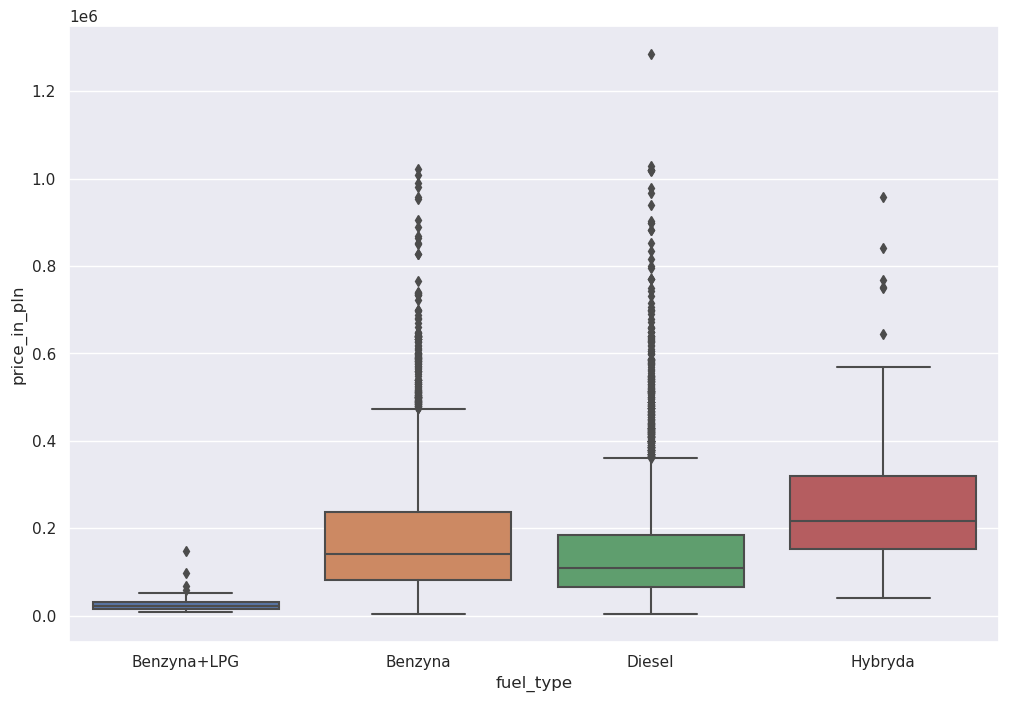

In [331]:
var = 'fuel_type'
data = pd.concat([bmw_df['price_in_pln'], bmw_df[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="price_in_pln", data=data)
#fig.axis(ymin=0, ymax=165);

The hybrid type (hybryda) has the highest average price, followed by petrol (Benzyna) and diesel. The lowest prices are typically found for the petrol + LPG (Benzyna + LPG) type.

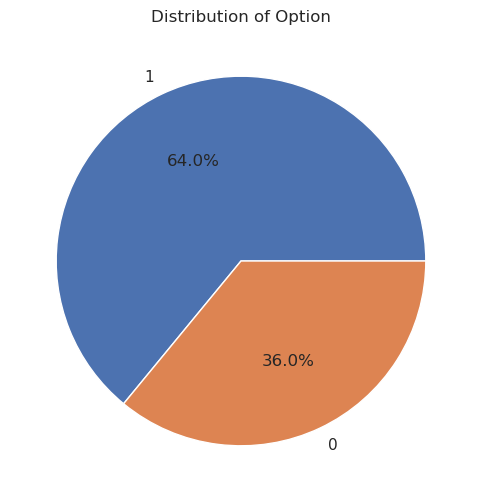

In [332]:
#Check the distribution of option
counts = bmw_df['Option'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Optional: adjust the figure size
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Option')
plt.show()

In [333]:
bmw_df.groupby('Option')['price_in_pln'].mean()

Option
0    162212.110406
1    168050.076941
Name: price_in_pln, dtype: float64

About 64% car with extral option, and the average price of cars with option is higher. 

In [334]:
bmw_df['voivodeship'].value_counts()

Mazowieckie                 1495
Śląskie                      944
Wielkopolskie                809
Małopolskie                  565
Dolnośląskie                 531
Pomorskie                    406
Łódzkie                      360
Kujawsko-pomorskie           270
Podkarpackie                 197
Zachodniopomorskie           181
Lubelskie                    178
Podlaskie                    172
Świętokrzyskie               165
Lubuskie                     118
Warmińsko-mazurskie           93
Opolskie                      87
Praga                          2
Moravian-Silesian Region       1
Brandenburg                    1
Name: voivodeship, dtype: int64

In [335]:
droped_rows=['Praga','Moravian-Silesian Region','Brandenburg']
bmw_df = bmw_df[~bmw_df['voivodeship'].isin(droped_rows)]

<function matplotlib.pyplot.show(close=None, block=None)>

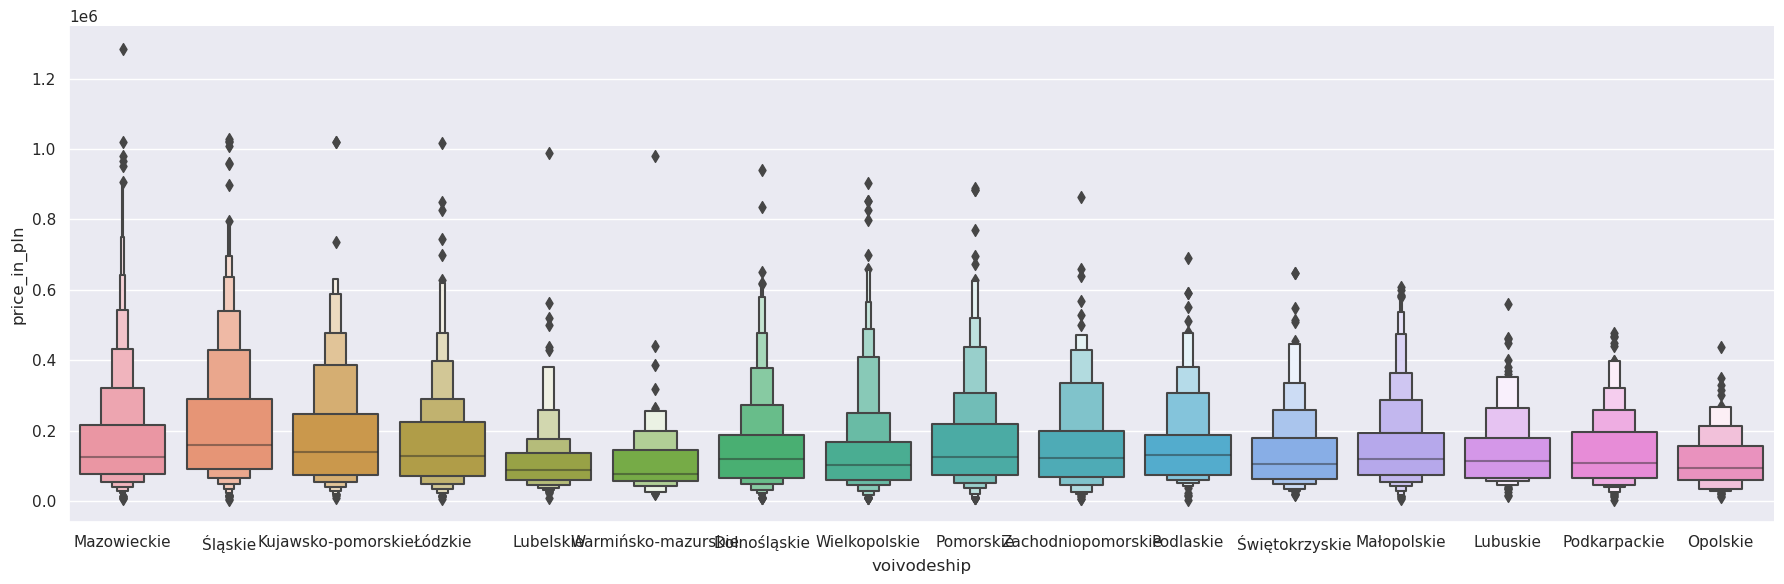

In [336]:
#Plot Location vs Price
sns.catplot(y='price_in_pln',x='voivodeship',data= bmw_df.sort_values('price_in_pln',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

It seems that the average price in different location are similar

In [337]:
bmw_df['Model'].value_counts()

Seria 5    1352
Seria 3    1073
X5          670
X3          565
Seria 4     316
X1          312
Seria 7     308
Seria 1     286
Seria 2     254
X6          224
X4          202
X2          119
3GT         110
Seria 6      87
M3           85
i3           78
X7           67
Seria 8      61
M4           57
M5           54
5GT          38
M2           37
iX           36
X6M          24
i4           22
M8           22
6GT          22
i7           19
Z4           19
iX3          10
XM           10
i8            7
1M            7
M6            6
iX1           6
Z3            3
Name: Model, dtype: int64

In [338]:
#Drop the model with little sample size
sample_sizes = bmw_df['Model'].value_counts()
models_to_drop = sample_sizes[sample_sizes < 30].index
new_bmw_df = bmw_df[~bmw_df['Model'].isin(models_to_drop)]

<function matplotlib.pyplot.show(close=None, block=None)>

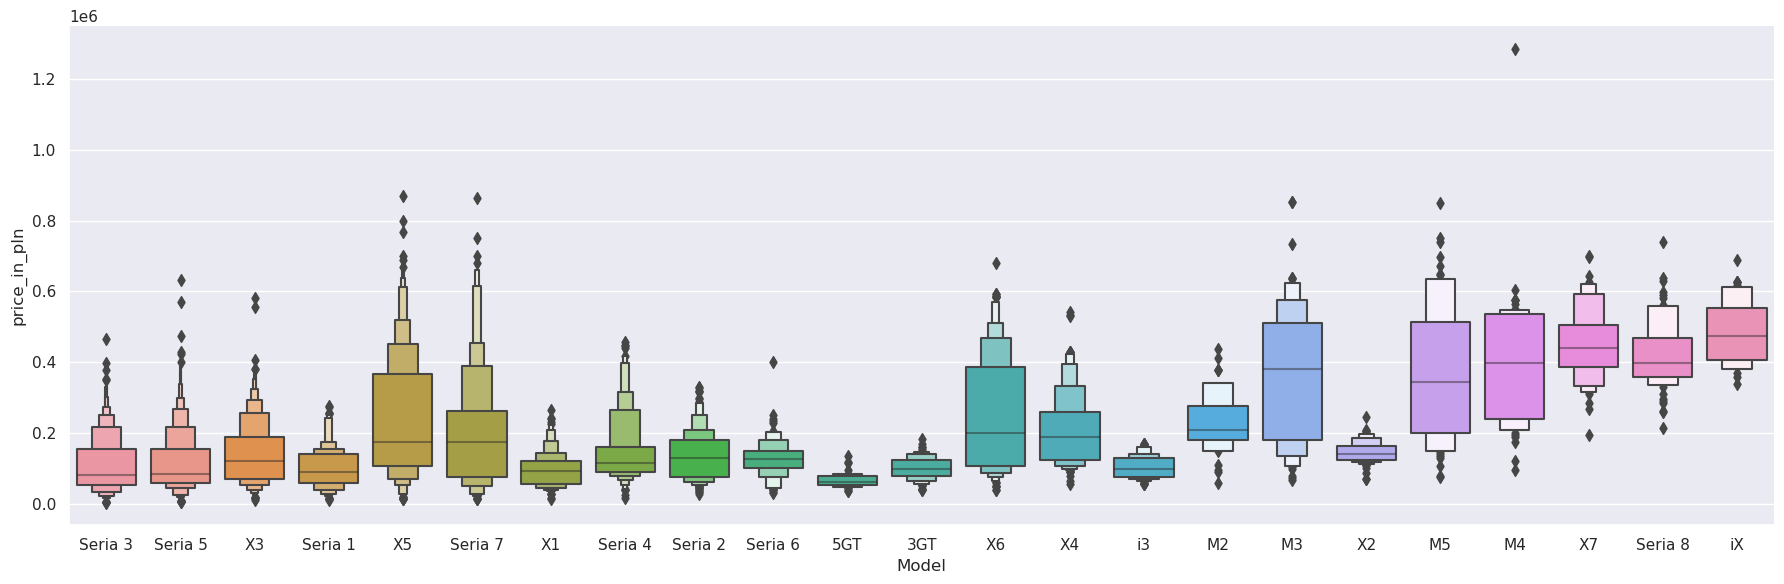

In [339]:
#Plot Model vs Price
sns.catplot(y='price_in_pln',x='Model',data= new_bmw_df.sort_values('price_in_pln',ascending=True),kind="boxen",height=6, aspect=3)
plt.show

In [340]:
#Check Gearbox
new_bmw_df['gearbox'].value_counts()

automatic    6220
manual        174
Name: gearbox, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

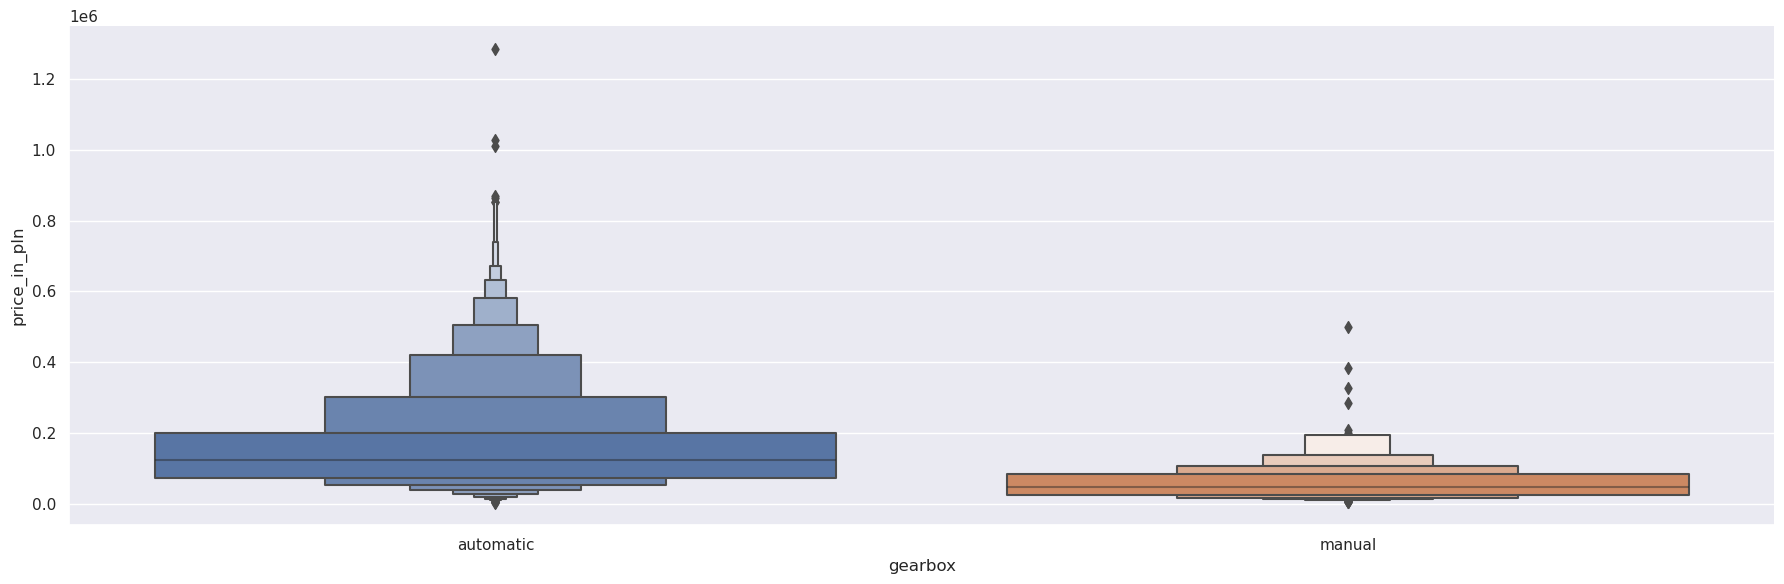

In [341]:
#Plot Gearbox vs Price
sns.catplot(y='price_in_pln',x='gearbox',data= new_bmw_df.sort_values('price_in_pln',ascending=True),kind="boxen",height=6, aspect=3)
plt.show

# 4. Model Building

In this part, I will build linear regression, Random Forest Regression and XGBoost model to predict the price of BMW

In [342]:
#One-hot-encoding
Fuel_t = new_bmw_df[['fuel_type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_type_Benzyna+LPG,fuel_type_Diesel,fuel_type_Hybryda
1300,1,0,0
1301,1,0,0
1302,0,0,0
1303,0,0,0
1304,0,0,0


In [343]:
Model = new_bmw_df[['Model']]
Model = pd.get_dummies(Model,drop_first=True)
Model.head()

,Model_5GT,Model_M2,Model_M3,Model_M4,Model_M5,Model_Seria 1,Model_Seria 2,Model_Seria 3,Model_Seria 4,Model_Seria 5,...,Model_Seria 8,Model_X1,Model_X2,Model_X3,Model_X4,Model_X5,Model_X6,Model_X7,Model_i3,Model_iX
1300,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1303,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
new_bmw_df['gearbox']= np.where(new_bmw_df['gearbox']=='manual',0,1)

In [345]:
final_df= pd.concat([new_bmw_df,Model,Fuel_t],axis=1)
final_df.head()

,price_in_pln,gearbox,fuel_type,city,voivodeship,year,engine_capacity(cm3),mileage(km),Brand,Model,...,Model_X3,Model_X4,Model_X5,Model_X6,Model_X7,Model_i3,Model_iX,fuel_type_Benzyna+LPG,fuel_type_Diesel,fuel_type_Hybryda
1300,18400.0,0,Benzyna+LPG,Piła,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 5,...,0,0,0,0,0,0,0,1,0,0
1301,34900.0,0,Benzyna+LPG,Swarzędz,Wielkopolskie,1996,2494.0,369763.0,BMW,Seria 3,...,0,0,0,0,0,0,0,1,0,0
1302,14350.0,0,Benzyna,Brzesko,Małopolskie,1999,2793.0,289000.0,BMW,Seria 5,...,0,0,0,0,0,0,0,0,0,0
1303,16800.0,0,Benzyna,Ostrów Wielkopolski,Wielkopolskie,1999,2793.0,289000.0,BMW,Seria 3,...,0,0,0,0,0,0,0,0,0,0
1304,107000.0,0,Benzyna,Białystok,Podlaskie,1999,1991.0,252687.0,BMW,M3,...,0,0,0,0,0,0,0,0,0,0


In [346]:
final_df.drop(["Model",'Brand','city','voivodeship','fuel_type'],axis=1,inplace=True)

In [347]:
final_df.head()

,price_in_pln,gearbox,year,engine_capacity(cm3),mileage(km),Option,Model_5GT,Model_M2,Model_M3,Model_M4,...,Model_X3,Model_X4,Model_X5,Model_X6,Model_X7,Model_i3,Model_iX,fuel_type_Benzyna+LPG,fuel_type_Diesel,fuel_type_Hybryda
1300,18400.0,0,1996,2494.0,369763.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1301,34900.0,0,1996,2494.0,369763.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1302,14350.0,0,1999,2793.0,289000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1303,16800.0,0,1999,2793.0,289000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1304,107000.0,0,1999,1991.0,252687.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
#Split into train and test set 
# Separate the features and the target variable
from sklearn.model_selection import train_test_split
X = final_df.drop('price_in_pln', axis=1)  
y = final_df['price_in_pln']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [349]:
#Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.6464297541759185
Accuracy on Testing set:  0.6608273559198823


In [350]:
#Random Forest
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

Accuracy on Traing set:  0.9546350288172545
Accuracy on Testing set:  0.7521788523001366


In [351]:
print("\t\tError Table")
print('Random Forest Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, rf_pred))
print('Random Forest R Squared Error          : ', metrics.r2_score(y_test, rf_pred))

		Error Table
Random Forest Mean Absolute Error      :  40606.64475091464
Random Forest R Squared Error          :  0.7521788523001366


In [352]:
#XGBoost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, 
                         learning_rate=0.04,
                         max_depth=6,
                         colsample_bytree=0.9)
xgb_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [353]:
predictions = xgb_model.predict(X_test)

In [354]:
print("\t\tError Table")
print('XGB Mean Absolute Error      : ', metrics.mean_absolute_error(predictions, y_test))
print("XGB R Squared Error :", metrics.r2_score(y_test, predictions))

		Error Table
XGB Mean Absolute Error      :  39456.37048063062
XGB R Squared Error : 0.760664092149856


In [359]:
#LightBoost
model_lgb = lgb.LGBMRegressor()

In [360]:
param={
    'num_leaves':[32,64],
    'min_data_in_leaf':[1,5,10],
    'colsample_bytree':[0.8,1],
    'n_estimators':[50, 100]
}

In [361]:
GS_LGB = GridSearchCV(model_lgb, param, cv=10)
GS_LGB.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is set=1, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=1
[LightGBM] [Warning] min_data_in_leaf is

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.8, 1],
                         'min_data_in_leaf': [1, 5, 10],
                         'n_estimators': [50, 100], 'num_leaves': [32, 64]})

In [362]:
GS_LGB.best_params_

{'colsample_bytree': 0.8,
 'min_data_in_leaf': 10,
 'n_estimators': 50,
 'num_leaves': 32}

In [363]:
lgb_pred = GS_LGB.predict(X_test)
print("\t\tError Table")
print('LGB Mean Absolute Error: ', metrics.mean_absolute_error(lgb_pred, y_test))
print("LGB R Squared Error :", metrics.r2_score(y_test, lgb_pred))

		Error Table
LGB Mean Absolute Error:  37430.44209999897
LGB R Squared Error : 0.7993537866842565


# 5 Reflection
The overall prediction power is not good enough. I believe there are several ways to further improve it:

1. More Comprehensive Data Cleaning and Feature Engineering:
I noticed that many rows have the same mileage (km), engine capacity (cm3), and even the year but are sold at different prices. I'm not sure if these are input errors or not. Considering this during data cleaning could help in building a better model. Additionally, it would be beneficial to take the brand and model into consideration when building the model. The brand awareness and popularity of a model can significantly influence the price. However, one of the challenges is that the input formats for different brands and models are quite different. This is one reason why I only chose BMW to build the prediction model.

2. Hyperparameter Tuning:
By utilizing the Optuna module, we can tune the hyperparameters of the XGBoost and LGB models to achieve better results.

3. More Data:
I believe the dataset is insufficient to build a reliable model for predicting used car prices. There are several reasons for this. Firstly, the total volume of data is not large enough; we require more training data. Secondly, the information in the dataset may overlook some important factors, such as the color, type, whether it is new/second/third hand, and so on. Moreover, macroeconomic indicators might also influence the demand and price of used cars.

Overall, there are numerous ways to train a better model, and I thoroughly enjoyed working on this project. If you have any suggestions or comments, please let me know. Thank you! Don't forget to UPVOTE!